<a href="https://colab.research.google.com/github/Bborub/Music/blob/main/3Studys_CCSIKYR_7Aug24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub
!pip install librosa matplotlib numpy yt-dlp
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import yt_dlp as youtube_dl

# Define the YouTube URL
youtube_url = 'https://www.youtube.com/watch?v=xCgZxrf8nrU'

# Download audio using yt-dlp
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'outtmpl': 'china_cat_sunflower.%(ext)s',
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([youtube_url])


[youtube] Extracting URL: https://www.youtube.com/watch?v=xCgZxrf8nrU
[youtube] xCgZxrf8nrU: Downloading webpage
[youtube] xCgZxrf8nrU: Downloading ios player API JSON
[youtube] xCgZxrf8nrU: Downloading web creator player API JSON
[youtube] xCgZxrf8nrU: Downloading player f8071a08
[youtube] xCgZxrf8nrU: Downloading m3u8 information
[info] xCgZxrf8nrU: Downloading 1 format(s): 251
[download] Destination: china_cat_sunflower.webm
[download] 100% of   10.14MiB in 00:00:00 at 35.59MiB/s  
[ExtractAudio] Destination: china_cat_sunflower.mp3
Deleting original file china_cat_sunflower.webm (pass -k to keep)


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

# Function to convert MP3 to WAV and load the file
def convert_and_load(mp3_path, wav_path):
    audio = AudioSegment.from_mp3(mp3_path)
    audio.export(wav_path, format='wav')
    y, sr = librosa.load(wav_path)
    return y, sr

# Convert and load the song
y, sr = convert_and_load('china_cat_sunflower.mp3', 'china_cat_sunflower.wav')


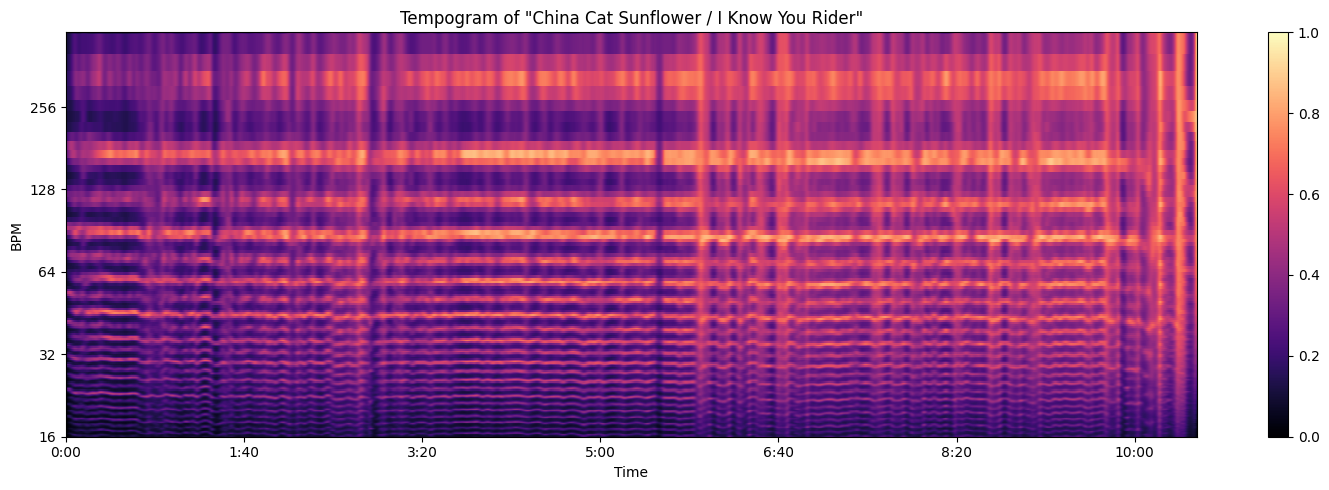

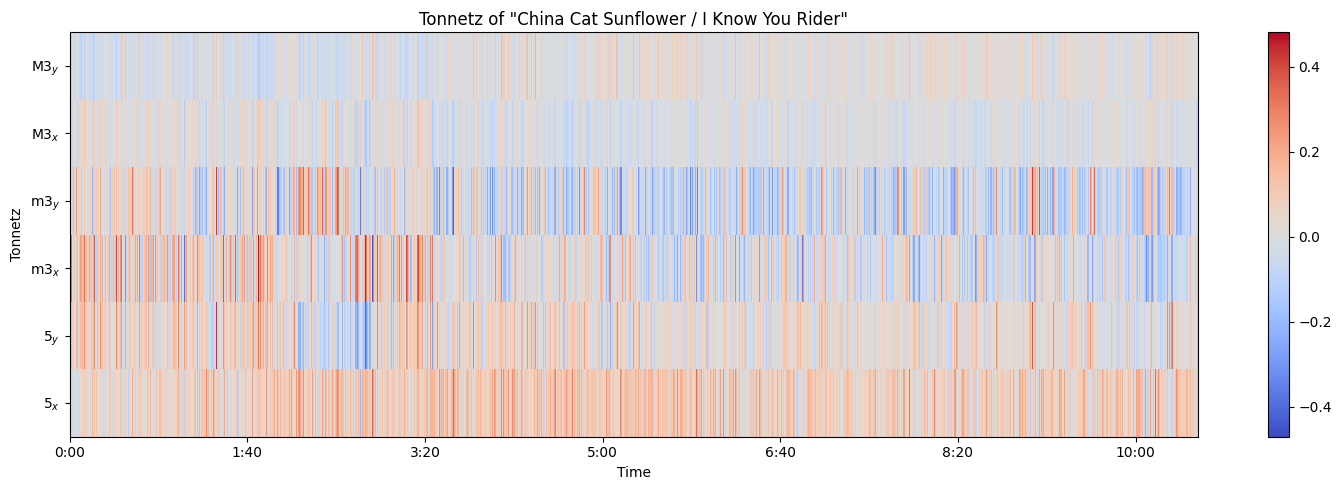

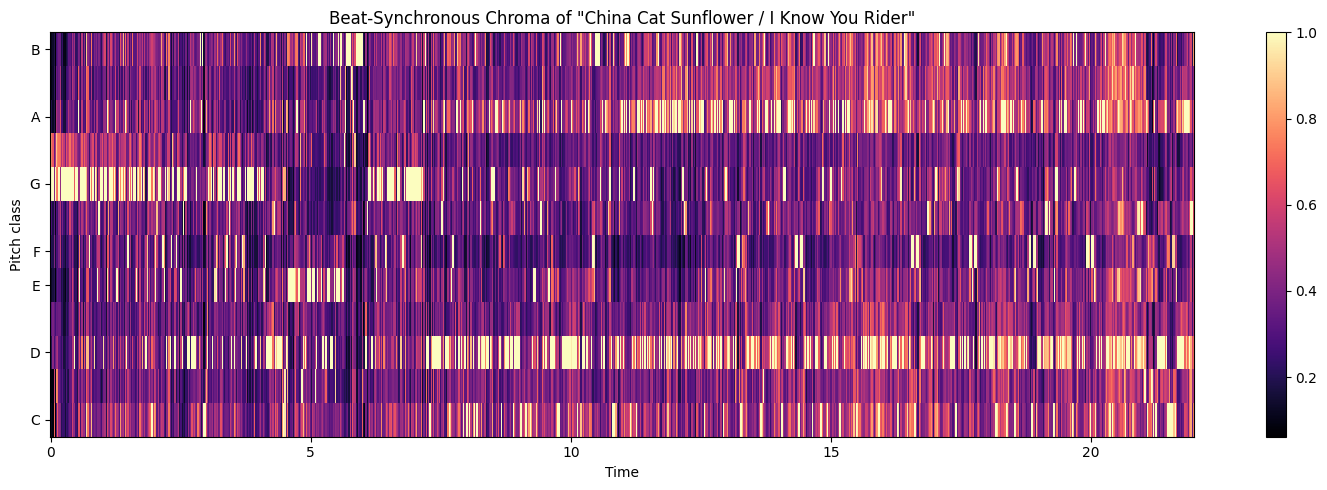

In [ ]:
### Tempogram
# Compute onset envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Compute tempogram
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)

# Plot Tempogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempogram, sr=sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram of "China Cat Sunflower / I Know You Rider"')
plt.tight_layout()
plt.show()

### Tonnetz
# Compute chroma feature
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# Compute Tonnetz
tonnetz = librosa.feature.tonnetz(chroma=chroma, sr=sr)

# Plot Tonnetz
plt.figure(figsize=(15, 5))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonnetz of "China Cat Sunflower / I Know You Rider"')
plt.tight_layout()
plt.show()

### Beat-Synchronous Features
# Compute beat frames
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Compute beat-synchronous chroma
chroma_sync = librosa.util.sync(chroma, beat_frames, aggregate=np.median)

# Plot Beat-Synchronous Chroma
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_sync, sr=sr, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.title('Beat-Synchronous Chroma of "China Cat Sunflower / I Know You Rider"')
plt.tight_layout()
plt.show()
